1:
et_peak: 3.095 h
inf_peak: 2.831 h
Delay: 15.8 min
2:
et_peak: 4.039 h
inf_peak: 3.821 h
Delay: 13.1 min
3:
et_peak: 4.765 h
inf_peak: 4.560 h
Delay: 12.3 min
4:
et_peak: 5.241 h
inf_peak: 5.096 h
Delay: 8.7 min
5:
et_peak: 5.909 h
inf_peak: 5.740 h
Delay: 10.1 min


3.095 h
2.453 h
38.533 mins delay


4.039 h
3.239 h
47.983 mins delay


4.765 h
4.220 h
32.667 mins delay


5.241 h
4.857 h
23.033 mins delay


5.909 h
5.384 h
31.483 mins delay


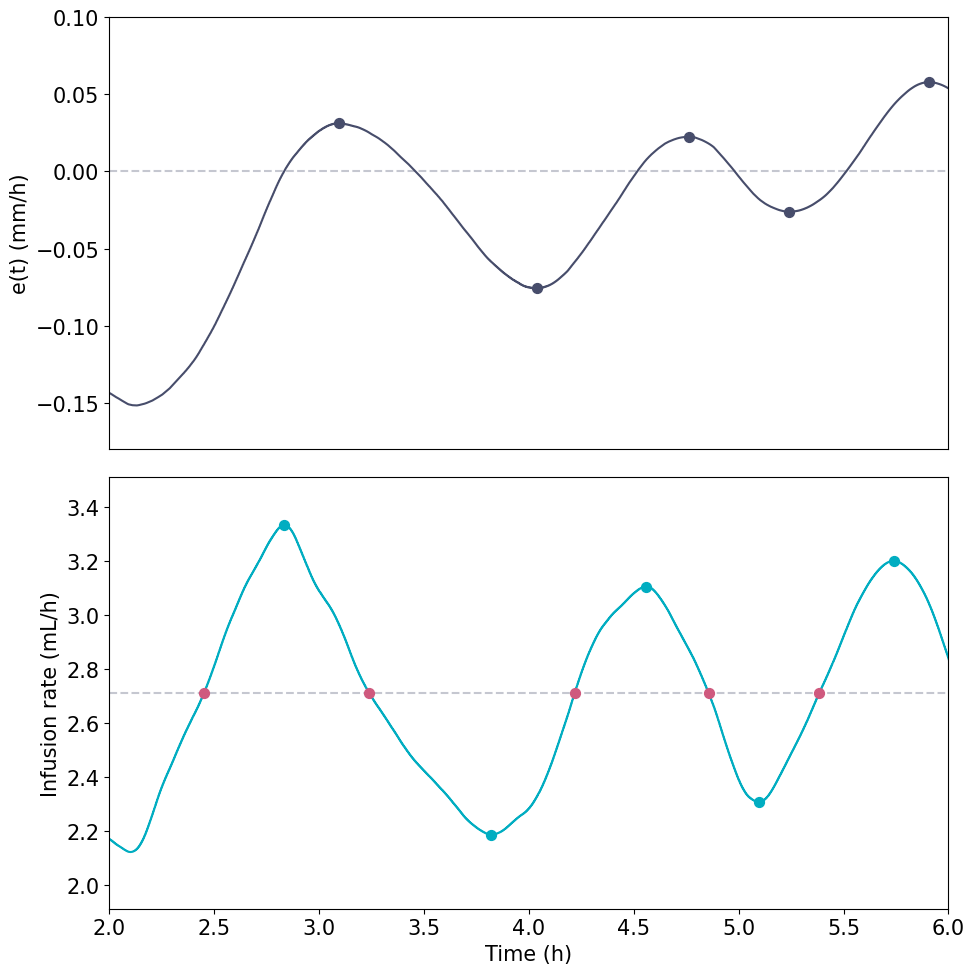

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

save_option = True
figsavepath = "../Figures/FigureS12_delay.svg"

path = "../Data/00_FCG-excels/230920_A_0.2mmh.xlsx"
df = pd.read_excel(path)
df = df[df['Time (h)'] < 10]
df = df[df['Time (h)'] > 1.98]

X = df['Time (h)'].to_list()
Y1 = df['e(t)'].to_list()
Y2 = df['Inf-rate (mL/h)'].to_list()

Evap_rate = 2.55978751206013/0.944 # evaporation rate (mL/h)

# check peak positions
ranges = [2.0, 3.5, 4.25, 4.8, 5.5, 6]

X1_peaks = []
X2_peaks = []
Y1_peaks = []
Y2_peaks = []

for k in range(len(ranges)-1):
    check_indices = [i for i, x in enumerate(X) if ranges[k] <= x <= ranges[k+1]]
    X_check = [X[i] for i in check_indices]
    Y1_check = [Y1[i] for i in check_indices]
    Y2_check = [Y2[i] for i in check_indices]
    
    if k%2 == 0:
        Y1_peak = X_check[Y1_check.index(max(Y1_check))]
        Y2_peak = X_check[Y2_check.index(max(Y2_check))]
    else:
        Y1_peak = X_check[Y1_check.index(min(Y1_check))]
        Y2_peak = X_check[Y2_check.index(min(Y2_check))]
    
    peak1_index = X_check.index(Y1_peak)
    peak2_index = X_check.index(Y2_peak)
    X1_peaks.append(Y1_peak)
    Y1_peaks.append(Y1_check[peak1_index])
    X2_peaks.append(Y2_peak)
    Y2_peaks.append(Y2_check[peak2_index])
    
    print(f'{k+1}:')
    print(f'et_peak: {Y1_peak:.3f} h')
    print(f'inf_peak: {Y2_peak:.3f} h')
    print(f'Delay: {(Y1_peak-Y2_peak)*60:.1f} min')
    

# Check intersection
y_positive_prev = -1 # 1 means positive, -1 means negative
X_zero = []
for x, y in zip(X,Y2):
    if y-Evap_rate > 0:
        y_positive = 1
    else:
        y_positive = -1
    if y_positive_prev != y_positive: # if it changed
        zero_time = x
        X_zero.append(x)
        y_positive_prev = y_positive
    if x > 6:
        break
        
Y_zero = [0*n+Evap_rate for n in X_zero]

# plot
plt.rcParams["font.size"] = 17
plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(nrows=2, ncols=1, tight_layout=True, figsize=(10,10))

color1 = '#474D6B' # dark blue
color2 = '#01ADC1' # light blue
color3 = '#CF597E' # red

# plot e(t)
ax1 = axes[0]
ax1.plot(X,Y1,c=color1)
ax1.scatter(X1_peaks,Y1_peaks,c=color1,s=50)
ax1.set_ylim(-0.18,0.1)
# ax1.set_xlabel('Time (h)')
ax1.set_ylabel('e(t) (mm/h)')
ax1.plot([0,10],[0,0],linestyle='dashed', c=f'{color1}50')
ax1.set_xlim(2,6)
ax1.set_xticks([])

# plot infusion rate (top)
ax2 = axes[1]
ax2.plot(X,Y2,c=color2)
ax2.plot([0,10],[Evap_rate,Evap_rate],linestyle='dashed', c=f'{color1}50')
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Infusion rate (mL/h)')
ax2.set_ylim(-0.8+Evap_rate,0.8+Evap_rate)
ax2.set_xlim(2,6)
ax2.scatter(X2_peaks,Y2_peaks,c=color2,s=50)
ax2.scatter(X_zero,Y_zero,c=color3,s=50, zorder = 2)


# for x in X_zero:
#     ax2.plot([x,x],[0,4],c=f'{color1}80',linestyle='dashed')

for i in range(len(X_zero)):
    print('\n')
    print(f'{X1_peaks[i]:.3f} h')
    print(f'{X_zero[i]:.3f} h')
    print(f'{(X1_peaks[i]-X_zero[i])*60:.3f} mins delay')

if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')

1:
et_peak: 3.095 h
inf_peak: 2.831 h
Delay: 15.8 min
2:
et_peak: 4.039 h
inf_peak: 3.821 h
Delay: 13.1 min
3:
et_peak: 4.765 h
inf_peak: 4.560 h
Delay: 12.3 min
4:
et_peak: 5.241 h
inf_peak: 5.096 h
Delay: 8.7 min
5:
et_peak: 5.909 h
inf_peak: 5.740 h
Delay: 10.1 min


3.095 h
2.453 h
38.533 mins delay


4.039 h
3.239 h
47.983 mins delay


4.765 h
4.220 h
32.667 mins delay


5.241 h
4.857 h
23.033 mins delay


5.909 h
5.384 h
31.483 mins delay


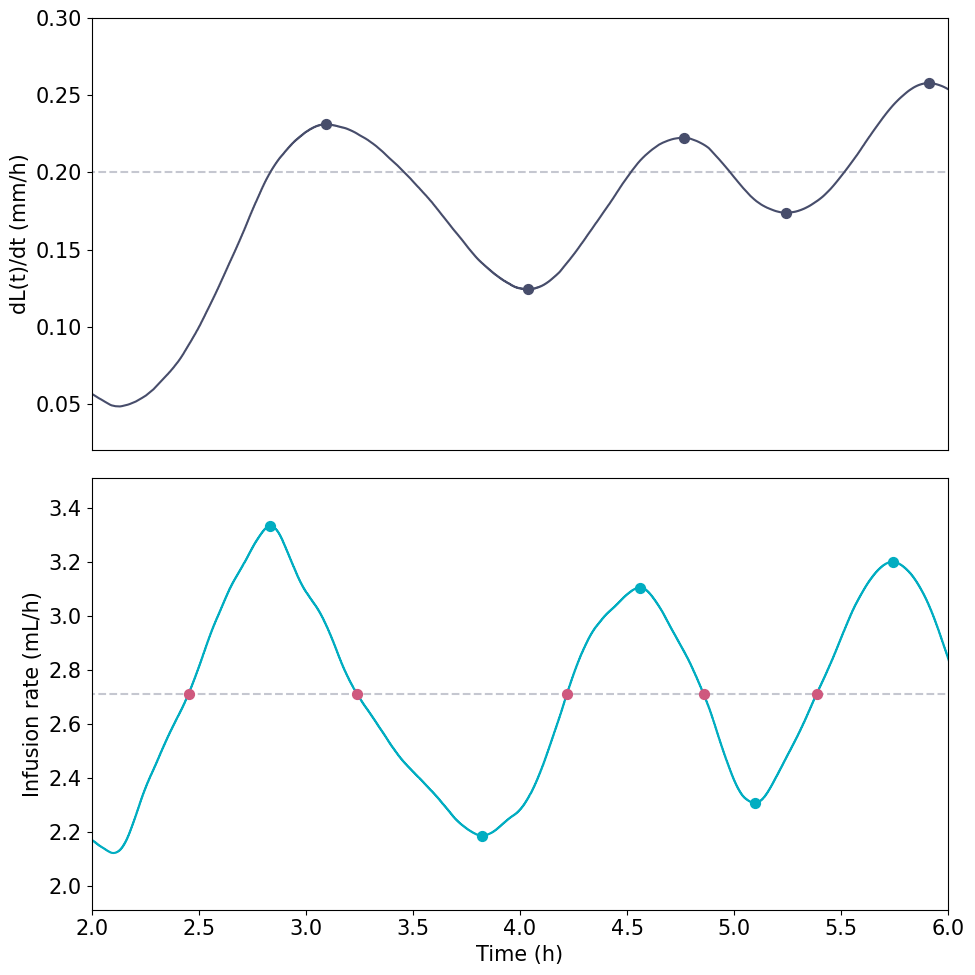

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

save_option = True
figsavepath = "../Figures/FigureS12_delay.svg"

path = "../Data/00_FCG-excels/230920_A_0.2mmh.xlsx"
df = pd.read_excel(path)
df = df[df['Time (h)'] < 10]
df = df[df['Time (h)'] > 1.98]

X = df['Time (h)'].to_list()
Y1 = df['e(t)'].to_list()
Y1 = [n + 0.2 for n in Y1]
Y2 = df['Inf-rate (mL/h)'].to_list()

Evap_rate = 2.55978751206013/0.944 # evaporation rate (mL/h)

# check peak positions
ranges = [2.0, 3.5, 4.25, 4.8, 5.5, 6]

X1_peaks = []
X2_peaks = []
Y1_peaks = []
Y2_peaks = []

for k in range(len(ranges)-1):
    check_indices = [i for i, x in enumerate(X) if ranges[k] <= x <= ranges[k+1]]
    X_check = [X[i] for i in check_indices]
    Y1_check = [Y1[i] for i in check_indices]
    Y2_check = [Y2[i] for i in check_indices]
    
    if k%2 == 0:
        Y1_peak = X_check[Y1_check.index(max(Y1_check))]
        Y2_peak = X_check[Y2_check.index(max(Y2_check))]
    else:
        Y1_peak = X_check[Y1_check.index(min(Y1_check))]
        Y2_peak = X_check[Y2_check.index(min(Y2_check))]
    
    peak1_index = X_check.index(Y1_peak)
    peak2_index = X_check.index(Y2_peak)
    X1_peaks.append(Y1_peak)
    Y1_peaks.append(Y1_check[peak1_index])
    X2_peaks.append(Y2_peak)
    Y2_peaks.append(Y2_check[peak2_index])
    
    print(f'{k+1}:')
    print(f'et_peak: {Y1_peak:.3f} h')
    print(f'inf_peak: {Y2_peak:.3f} h')
    print(f'Delay: {(Y1_peak-Y2_peak)*60:.1f} min')
    

# Check intersection
y_positive_prev = -1 # 1 means positive, -1 means negative
X_zero = []
for x, y in zip(X,Y2):
    if y-Evap_rate > 0:
        y_positive = 1
    else:
        y_positive = -1
    if y_positive_prev != y_positive: # if it changed
        zero_time = x
        X_zero.append(x)
        y_positive_prev = y_positive
    if x > 6:
        break
        
Y_zero = [0*n+Evap_rate for n in X_zero]

# plot
plt.rcParams["font.size"] = 17
plt.rcParams["font.size"] = 15
fig, axes = plt.subplots(nrows=2, ncols=1, tight_layout=True, figsize=(10,10))

color1 = '#474D6B' # dark blue
color2 = '#01ADC1' # light blue
color3 = '#CF597E' # red

# plot e(t)
ax1 = axes[0]
ax1.plot(X,Y1,c=color1)
ax1.scatter(X1_peaks,Y1_peaks,c=color1,s=50)
ax1.set_ylim(0.02,0.3)
# ax1.set_xlabel('Time (h)')
ax1.set_ylabel('dL(t)/dt (mm/h)')
ax1.plot([0,10],[0.2,0.2],linestyle='dashed', c=f'{color1}50')
ax1.set_xlim(2,6)
ax1.set_xticks([])

# plot infusion rate (top)
ax2 = axes[1]
ax2.plot(X,Y2,c=color2)
ax2.plot([0,10],[Evap_rate,Evap_rate],linestyle='dashed', c=f'{color1}50')
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Infusion rate (mL/h)')
ax2.set_ylim(-0.8+Evap_rate,0.8+Evap_rate)
ax2.set_xlim(2,6)
ax2.scatter(X2_peaks,Y2_peaks,c=color2,s=50)
ax2.scatter(X_zero,Y_zero,c=color3,s=50, zorder = 2)


# for x in X_zero:
#     ax2.plot([x,x],[0,4],c=f'{color1}80',linestyle='dashed')

for i in range(len(X_zero)):
    print('\n')
    print(f'{X1_peaks[i]:.3f} h')
    print(f'{X_zero[i]:.3f} h')
    print(f'{(X1_peaks[i]-X_zero[i])*60:.3f} mins delay')

if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')

In [84]:
Evap_rate

2.711639313623019